In [66]:
import pandas as pd
import numpy as np


In [67]:
df = pd.read_excel("/content/play.xlsx")

In [68]:
df.head()

Outlook  Temperature  Humidity   Windy Decision
0  overcast           72        90  strong     play
1  overcast           83        78    weak     play
2  overcast           64        65  strong     play
3  overcast           81        75    weak     play
4     sunny           75        70  strong     play

In [69]:
print(df['Outlook'].unique())
df['Windy'].unique()
print([[df['Windy'].unique()]])

['overcast' 'sunny' 'rain']
[[array(['strong', 'weak'], dtype=object)]]


In [70]:
df_numeric=df[['Temperature','Humidity']]

In [71]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

encoder = OrdinalEncoder()
# transform data
windy_enc = encoder.fit_transform(df['Windy'].values.reshape(-1,1))
Windy=pd.DataFrame(windy_enc,columns=['Windy'])


In [72]:
Y=df.iloc[:,-1].values
Y

array(['play', 'play', 'play', 'play', 'play', 'dont_play', 'dont_play',
       'dont_play', 'play', 'dont_play', 'dont_play', 'play', 'play',
       'play'], dtype=object)

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [74]:
decision=pd.DataFrame(Y,columns=['Decision'])

In [75]:
Outlook_enc=pd.get_dummies(df['Outlook'])
Outlook_enc

overcast  rain  sunny
0          1     0      0
1          1     0      0
2          1     0      0
3          1     0      0
4          0     0      1
5          0     0      1
6          0     0      1
7          0     0      1
8          0     0      1
9          0     1      0
10         0     1      0
11         0     1      0
12         0     1      0
13         0     1      0

In [76]:
X=pd.concat([df_numeric,Outlook_enc,Windy,decision],axis=1)
X

Temperature  Humidity  overcast  rain  sunny  Windy  Decision
0            72        90         1     0      0    0.0         1
1            83        78         1     0      0    1.0         1
2            64        65         1     0      0    0.0         1
3            81        75         1     0      0    1.0         1
4            75        70         0     0      1    0.0         1
5            80        90         0     0      1    0.0         0
6            85        85         0     0      1    1.0         0
7            72        95         0     0      1    1.0         0
8            69        70         0     0      1    1.0         1
9            71        80         0     1      0    0.0         0
10           65        70         0     1      0    0.0         0
11           75        80         0     1      0    1.0         1
12           68        80         0     1      0    1.0         1
13           70        96         0     1      0    1.0         1

In [77]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled_X=sc.fit_transform(X)

In [78]:
from sklearn.preprocessing import normalize
data_scaled = normalize(scaled_X)

In [79]:
data_scaled=pd.DataFrame(sc.fit_transform(X),columns=['Temperature','Humidity','overcast','rain','sunny','Windy','Decision'])

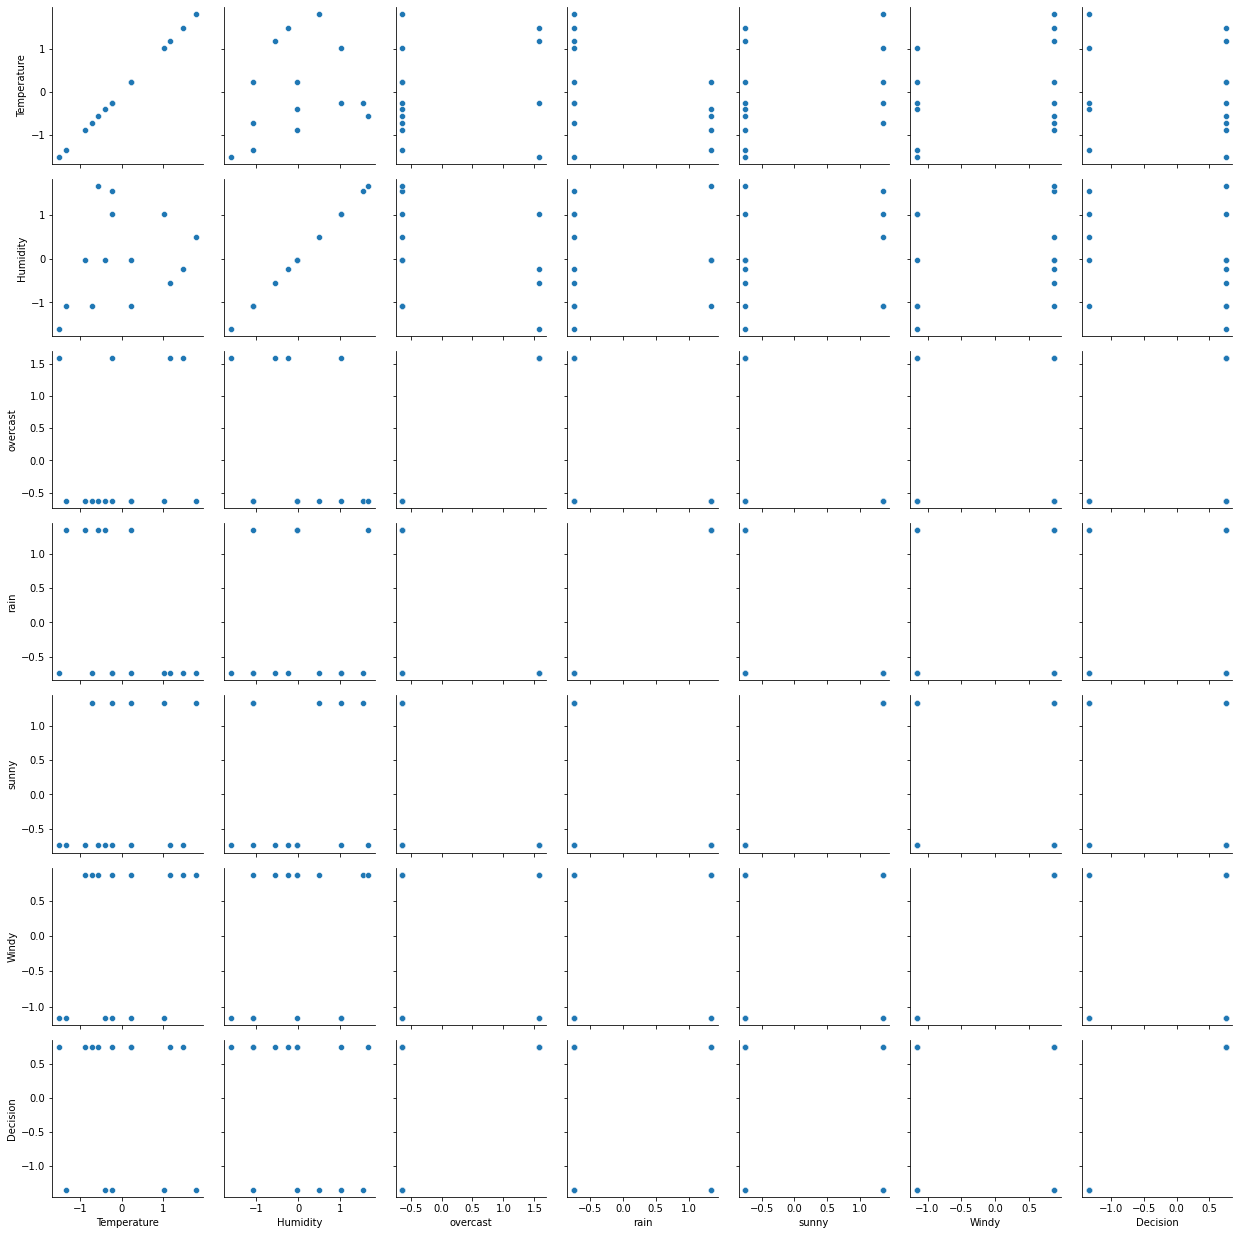

In [80]:
import seaborn as sns
g = sns.PairGrid(data_scaled)
g.map(sns.scatterplot)

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import average
from sklearn.cluster import AgglomerativeClustering

In [82]:
avg = average(data_scaled)

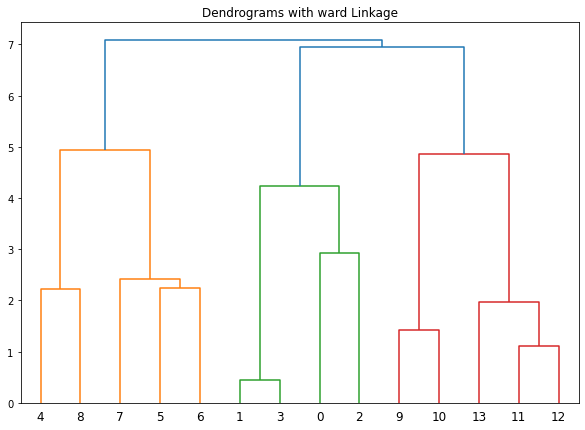

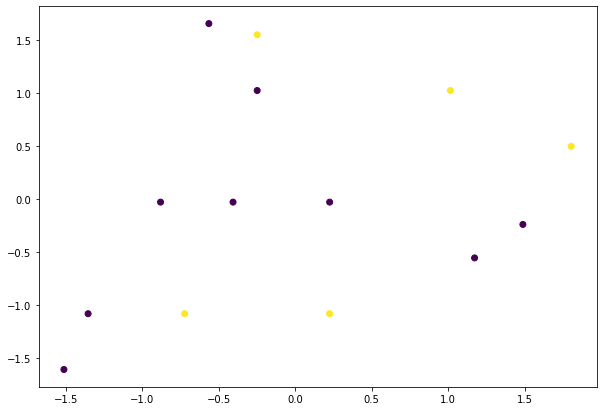

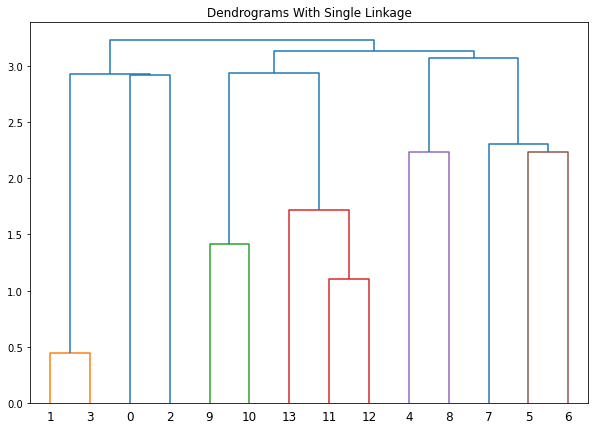

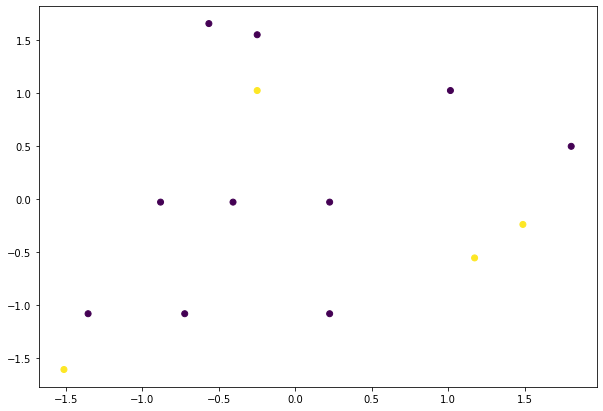

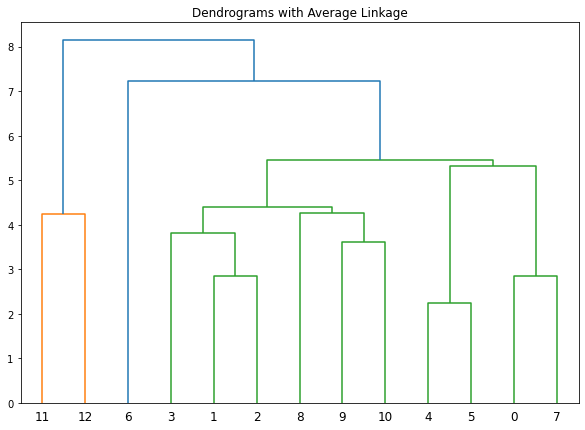

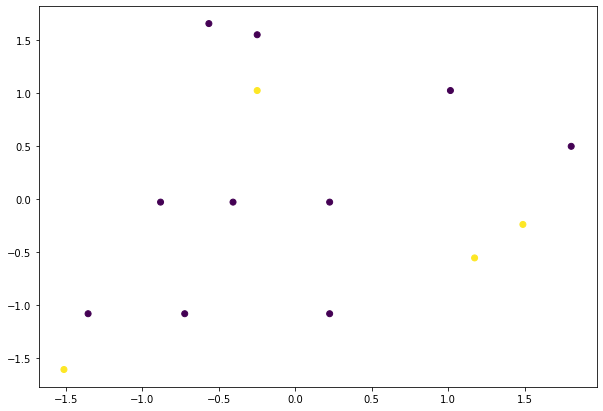

In [83]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with ward Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='ward',metric='euclidean'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='euclidean'))

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='euclidean'))

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 


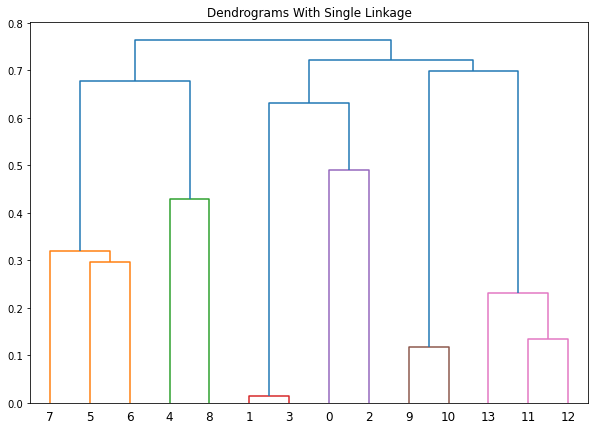

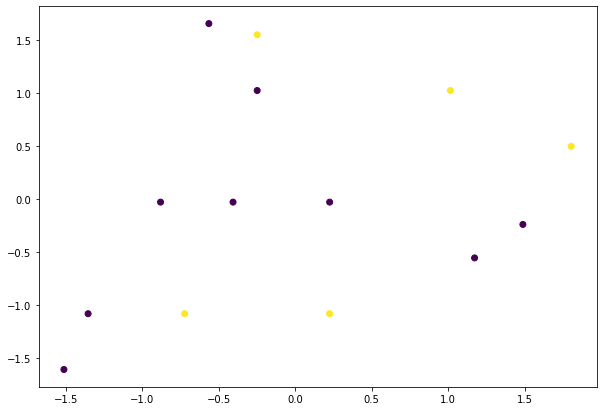

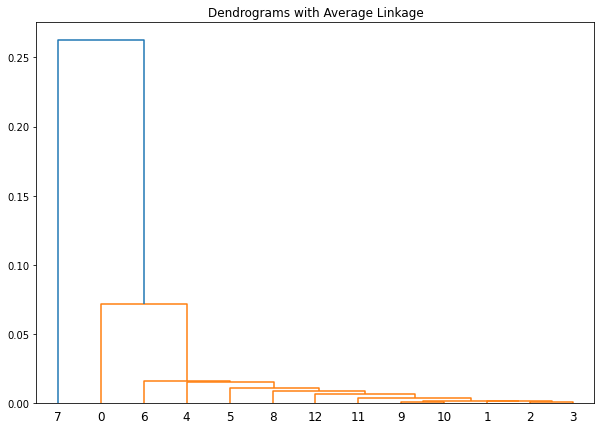

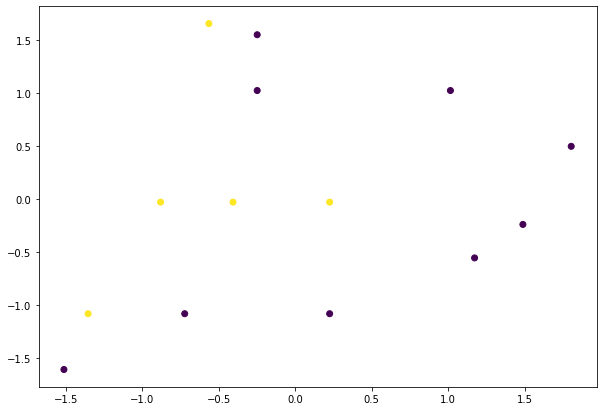

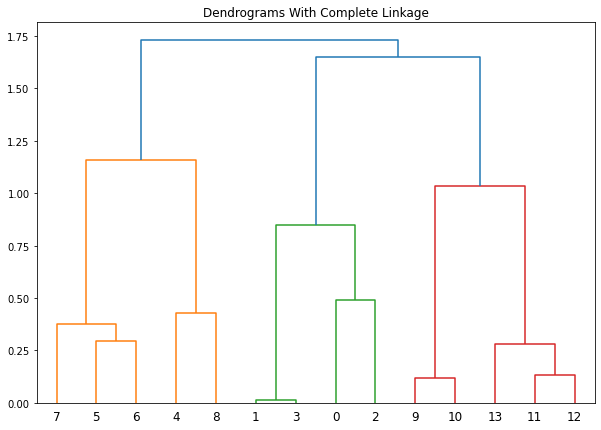

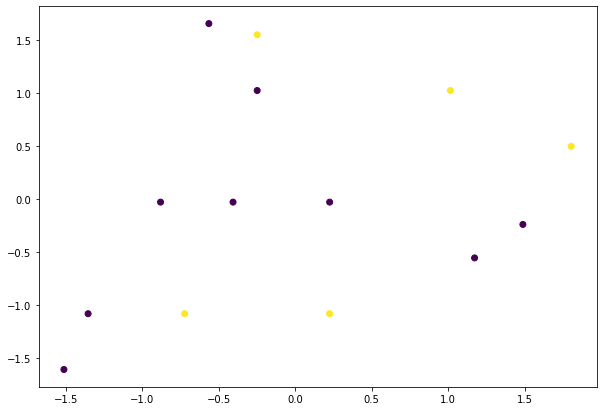

In [84]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='cosine'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='cosine'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Complete Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='complete',metric='cosine'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 


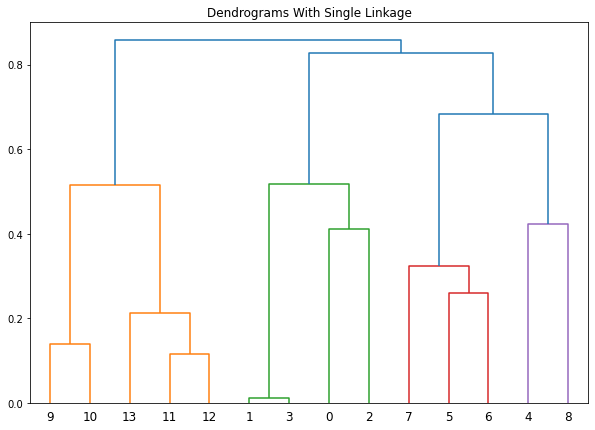

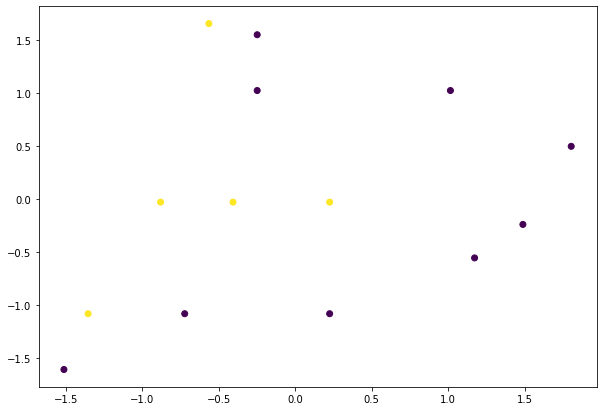

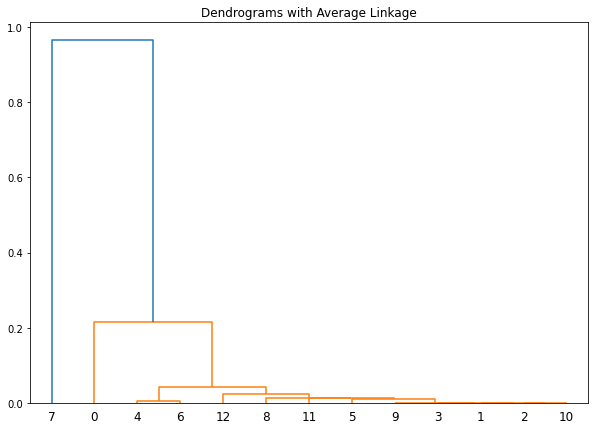

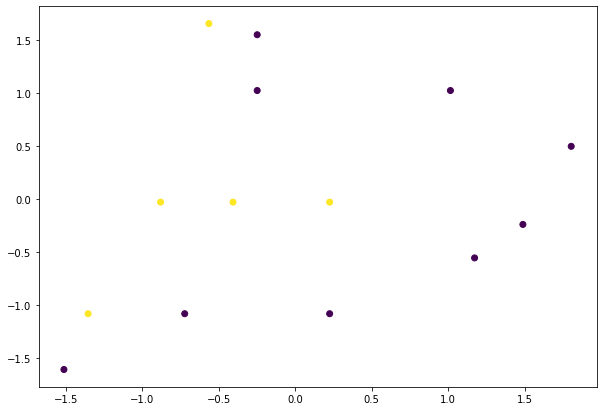

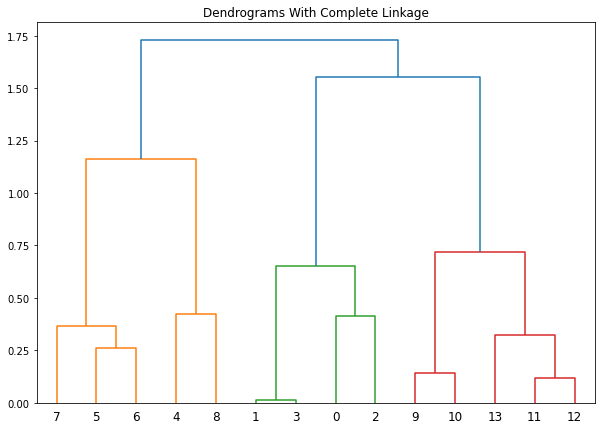

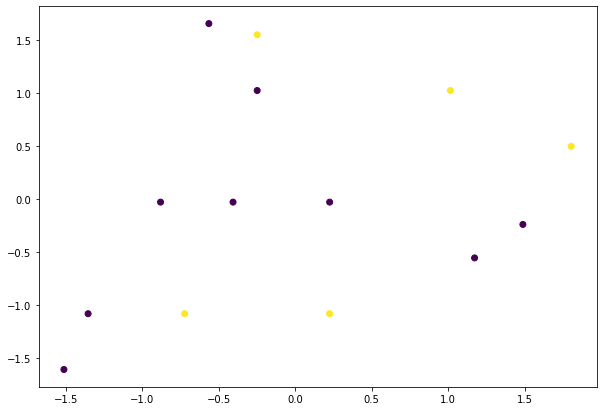

In [85]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='correlation'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='single')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='correlation'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='average')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Complete Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='complete',metric='correlation'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='complete')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 



In [86]:
import random
import numpy as np
r = [100]
n = [120]
for r, n in zip(r, n):
  t = np.linspace(0, 2*np.pi, n, endpoint=False)
  x1 = r * np.cos(t)
  y1 = r * np.sin(t)
  data1 = np.c_[x1, y1]
noise = 0.008*np.asarray(random.sample(range(0,n),n))
y1 = y1 + noise
r = [30]
n = [120]
for r, n in zip(r, n):
  t = np.linspace(0, 2*np.pi, n, endpoint=False)
  x2 = r * np.cos(t)
  y2 = r * np.sin(t)
  data2 = np.c_[x2, y2]
noise = 0.008*np.asarray(random.sample(range(0,n),n))
y2 = y2+ noise

x = np.concatenate((x1, x2), axis=None)        
y = np.concatenate((y1, y2), axis=None)        
        
data = list(zip(x, y))

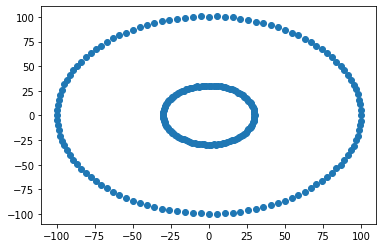

In [87]:
plt.scatter(x,y)
plt.show()

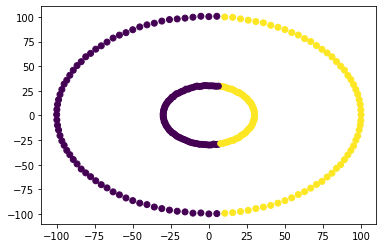

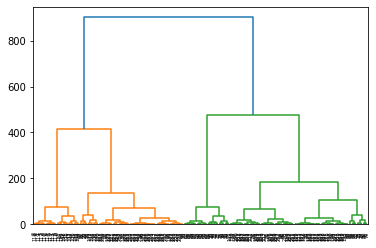

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

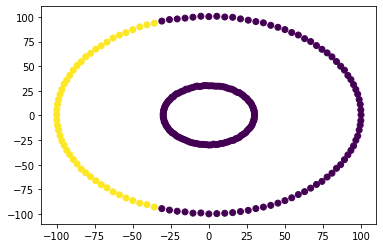

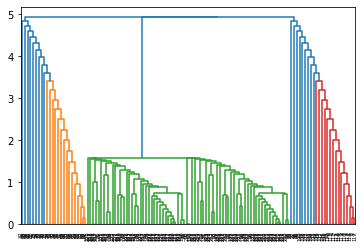

In [89]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

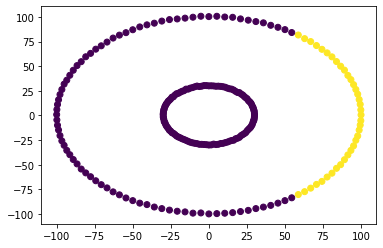

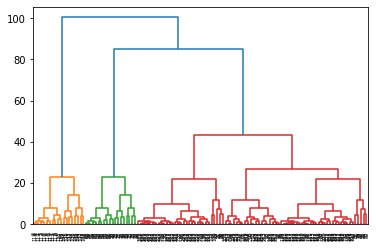

In [90]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

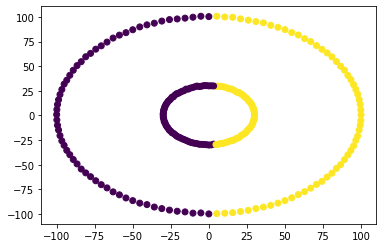

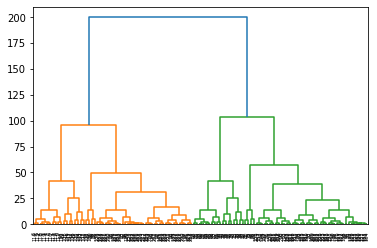

In [91]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [92]:
from sklearn.cluster import KMeans
import seaborn as sns 

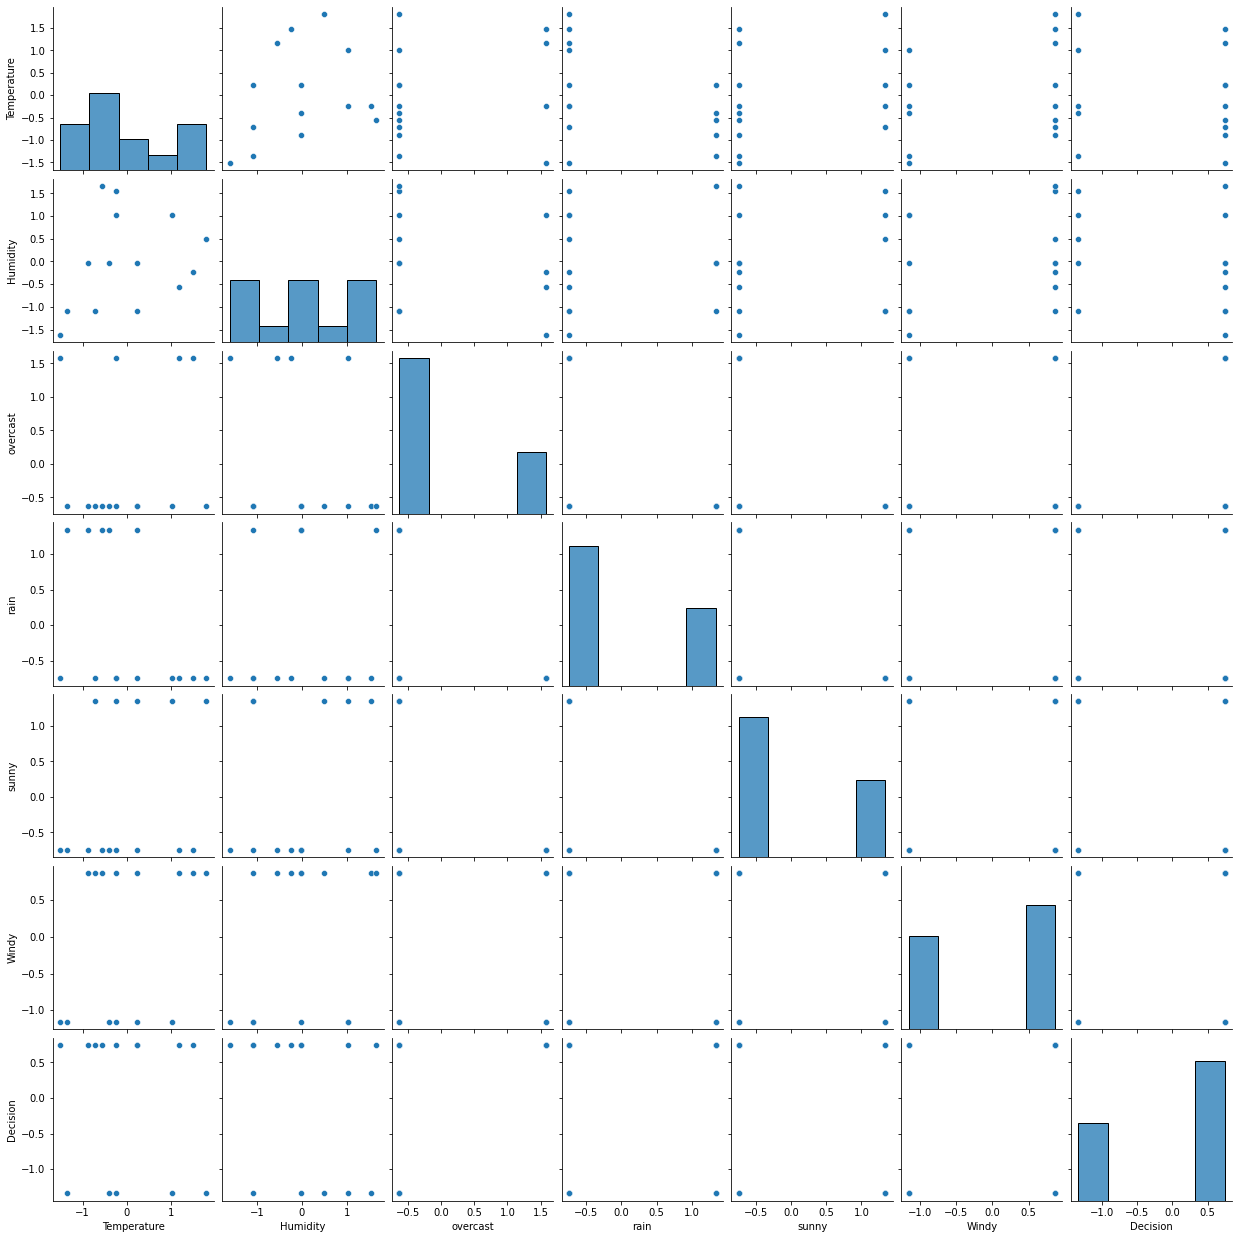

In [93]:
sns.pairplot(data_scaled)

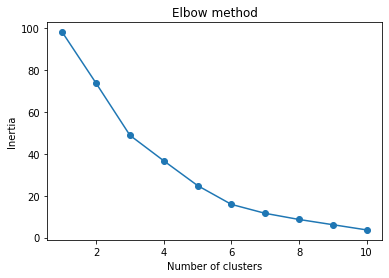

In [94]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [95]:
x=data_scaled.iloc[:,:-1]
print(x)

    Temperature  Humidity  overcast      rain     sunny     Windy
0     -0.248148  1.024440  1.581139 -0.745356 -0.745356 -1.154701
1      1.488890 -0.241045  1.581139 -0.745356 -0.745356  0.866025
2     -1.511449 -1.611987  1.581139 -0.745356 -0.745356 -1.154701
3      1.173065 -0.557416  1.581139 -0.745356 -0.745356  0.866025
4      0.225589 -1.084702 -0.632456 -0.745356  1.341641 -1.154701
5      1.015152  1.024440 -0.632456 -0.745356  1.341641 -1.154701
6      1.804715  0.497155 -0.632456 -0.745356  1.341641  0.866025
7     -0.248148  1.551726 -0.632456 -0.745356  1.341641  0.866025
8     -0.721886 -1.084702 -0.632456 -0.745356  1.341641  0.866025
9     -0.406061 -0.030131 -0.632456  1.341641 -0.745356 -1.154701
10    -1.353537 -1.084702 -0.632456  1.341641 -0.745356 -1.154701
11     0.225589 -0.030131 -0.632456  1.341641 -0.745356  0.866025
12    -0.879799 -0.030131 -0.632456  1.341641 -0.745356  0.866025
13    -0.563974  1.657183 -0.632456  1.341641 -0.745356  0.866025


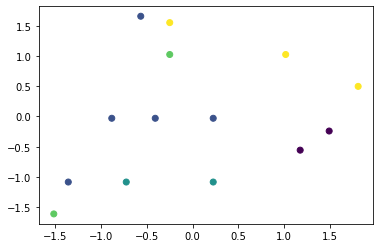

In [96]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

plt.scatter(x['Temperature'], x['Humidity'], c=kmeans.labels_)
plt.show()

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [98]:
#pip install --upgrade xlrd

In [99]:
boston_data=pd.read_excel("/content/boston housing.xls")
boston_data=boston_data.iloc[:,:-1]

In [100]:
df=boston_data.isnull().count()
df

CRIM     506
ZN       506
INDUS    506
CHAS     506
NOX      506
RM       506
AGE      506
DIS      506
RAD      506
TAX      506
PT       506
B        506
LSTAT    506
dtype: int64

Boston Housing Data Tried with t-SNE method introduced in the lecture

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.001s...
[t-SNE] Computed neighbors for 506 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 35.576673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.325058
[t-SNE] KL divergence after 5000 iterations: 0.720511


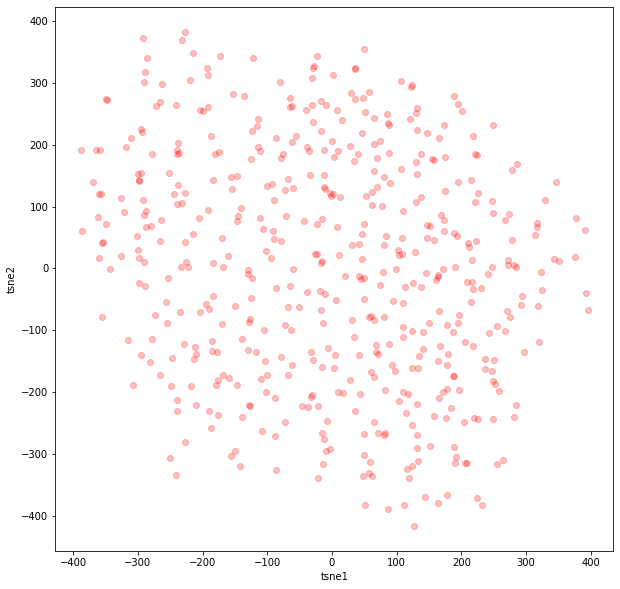

In [101]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(boston_data)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='red')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [102]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

x=tsne_df_scale.iloc[:,0]
y=tsne_df_scale.iloc[:,1]
z=tsne_df_scale.iloc[:,2]

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (x+y+z),
                    cmap = plt.get_cmap('hsv'),
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
plt.show()

Text(0, 0.5, 'Inertia')

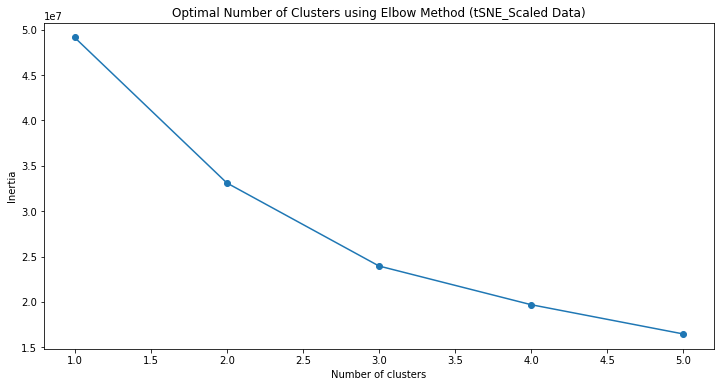

In [103]:
sse = []
k_list = range(1, 6)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,6), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [104]:
kmeans_tsne_scale = KMeans(n_clusters=3, n_init=100, max_iter=2000, init='k-means++', random_state=42).fit(tsne_df_scale)
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, 
                palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Implementing PCA on Boston Housing Data & then performing K-means Clustering 

In [105]:
from sklearn.decomposition import PCA

In [106]:
wcss = []
for i in range(1,14):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(boston_data)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,14), wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [107]:
pca = PCA(3)
data = pca.fit_transform(boston_data)

Text(0.5, 1.0, 'Using Complete Linkage')

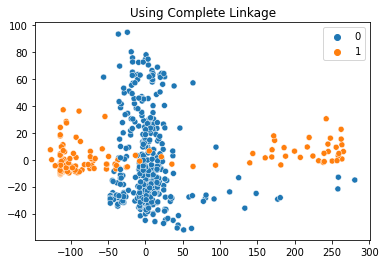

In [108]:
model = KMeans(n_clusters=2,max_iter=3,init = "k-means++")
model.fit(data)
data_labels = model.labels_
sns.scatterplot(x=data[:,1], 
                y=data[:,2], 
                data=data, 
                hue=data_labels).set_title('Using Complete Linkage')

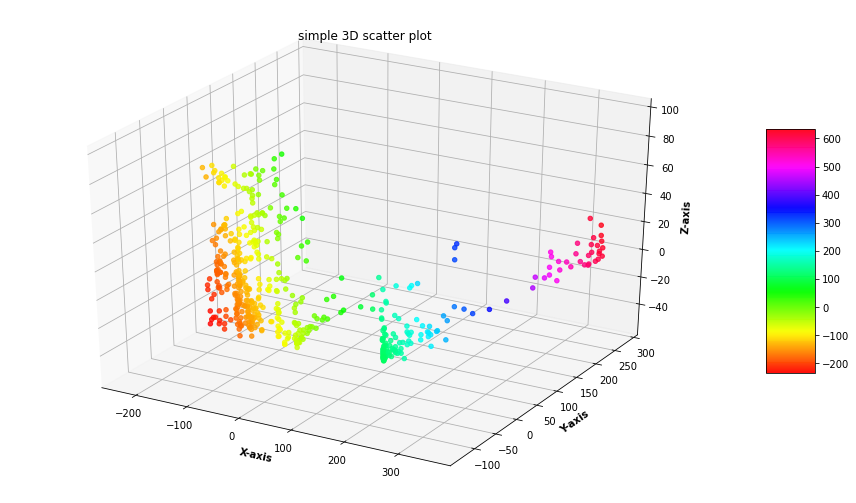

In [109]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

x=data[:,0]
y=data[:,1]
z=data[:,2]

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (x+y+z),
                    cmap = plt.get_cmap('hsv'),
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
plt.show()

